<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [2]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [22]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

In [4]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [23]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "used_car_price_analysis.csv")

---


# Test Environment


In [24]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
import pandas as pd

# Specify the file path
file_path = "used_car_price_analysis.csv"

# Read the CSV file into a Pandas data frame
df = pd.read_csv(file_path)
df

# Assuming the first rows of the file are the headers, you don't need to specify any additional parameters

# Additional details:
# - The `pd.read_csv()` function is used to read a CSV file into a Pandas data frame.
# - By default, it assumes that the first row of the file contains the headers for the data.
# - If your file doesn't have headers, you can specify `header=None` as an additional parameter.
# - You can also specify other parameters, such as `sep` to specify the delimiter used in the file.
# - Make sure you have the Pandas library installed in your Python environment before running this code.

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150.0,47.1,1.4,8999
17962,B-MAX,2014,Manual,40700,Petrol,30.0,57.7,1.0,7499
17963,Focus,2015,Manual,7010,Diesel,20.0,67.3,1.6,9999
17964,KA,2018,Manual,5007,Petrol,145.0,57.7,1.2,8299


In [25]:
import pandas as pd

# Assuming you already have a Pandas data frame named 'df'

# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]
columns_with_missing_values

# Additional details:
# - The `df.isnull()` function returns a Boolean data frame where each cell is True if it contains a missing value (NaN), and False otherwise.
# - The `df.columns` attribute returns the column labels of the data frame.
# - The `.any()` method returns a Boolean Series indicating whether any value in the given axis (in this case, columns) is True.
# - Finally, the `.columns` attribute is used to retrieve the column labels where the condition is True.

# You can now use the 'columns_with_missing_values' variable to further analyze or handle the columns with missing values.

Index(['tax'], dtype='object')

In [26]:
# Assuming you already have a Pandas data frame named 'df'

# Replace missing values in the 'Screen_Size_cm' column with the most frequent value
most_frequent_value = df['tax'].mode()[0]
df['tax'].fillna(most_frequent_value, inplace=True)

# Replace missing values in the 'Weight_kg' column with the mean value
#mean_value = df['Weight_kg'].mean()
#df['Weight_kg'].fillna(mean_value, inplace=True)

# Additional details:
# - The `.mode()` method is used to calculate the most frequent value in a column.
# - The `[0]` indexing is used to retrieve the most frequent value from the resulting Series.
# - The `.fillna()` method is used to replace missing values with a specified value.
# - The `inplace=True` parameter is used to modify the original data frame instead of creating a new one.

# You can now use the modified 'df' data frame, which has the missing values replaced according to the guidelines.

<ipython-input-26-1ba9cc718573>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tax'].fillna(most_frequent_value, inplace=True)


In [27]:
correlation_with_price = df[['year','mileage','tax', 'mpg', 'engineSize']].corrwith(df['price'])

In [28]:
correlation_with_price = correlation_with_price.sort_values(ascending=False)
correlation_with_price

year          0.636009
engineSize    0.411178
tax           0.406824
mpg          -0.346419
mileage      -0.530659
dtype: float64

In [29]:
correlation_with_price

year          0.636009
engineSize    0.411178
tax           0.406824
mpg          -0.346419
mileage      -0.530659
dtype: float64

In [30]:
# Assuming your DataFrame is named 'df'

# Count the number of unique Manufacturers
transmission_counts = df['transmission'].nunique()

# Print the result
print(f"Number of unique transmission types: {transmission_counts}") 

Number of unique transmission types: 3


In [31]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Count occurrences of each unique value in the 'Manufacturer' column
transmission_counts = df['transmission'].value_counts()

# Print the results
print(transmission_counts)

transmission
Manual       15518
Automatic     1361
Semi-Auto     1087
Name: count, dtype: int64


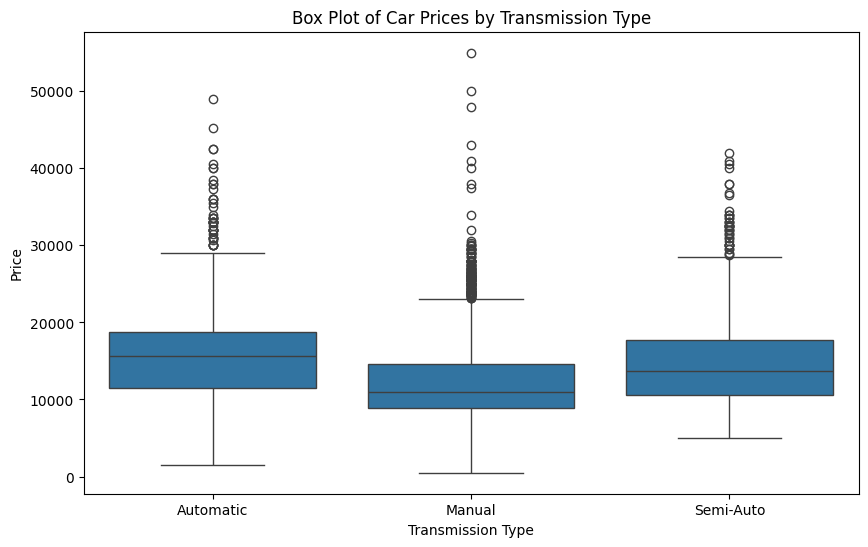

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create the box plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='transmission', y='price', data=df)

# Add labels and title
plt.title('Box Plot of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')

# Show the plot
plt.show()

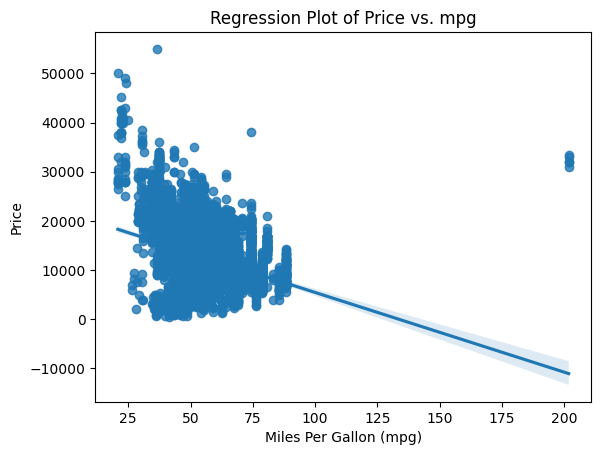

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create the regression plot
sns.regplot(x='mpg', y='price', data=df)

# Add labels and title
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Price')
plt.title('Regression Plot of Price vs. mpg')

# Show the plot
plt.show()

[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
